In [1]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.1 MB 5.3 MB/s 
     |████████████████████████████████| 11.3 MB 43.8 MB/s 
     |████████████████████████████████| 22.3 MB 74.6 MB/s 
     |████████████████████████████████| 13.2 MB 46.5 MB/s 
     |████████████████████████████████| 23.5 MB 1.4 MB/s 
     |████████████████████████████████| 1.8 MB 55.0 MB/s 
     |████████████████████████████████| 145 kB 66.5 MB/s 
     |████████████████████████████████| 76.3 MB 1.2 MB/s 
     |████████████████████████████████| 96 kB 5.8 MB/s 
     |████████████████████████████████| 164 kB 76.7 MB/s 
     |████████████████████████████████| 182 kB 37.3 MB/s 
     |████████████████████████████████| 78 kB 6.8 MB/s 
     |████████████████████████████████| 4.7 MB 41.3 MB/s 
     |████████████████████████████████| 130 kB 55.0 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
  Created wheel for retrying: filen

In [2]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [12]:
import pandas as pd

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols = ["time","visibility_o"],
                          parse_dates=["time"]).set_index("time")

station["visibility_o"].describe()

count    41312.000000
mean      8167.830170
std       3302.760811
min         48.000000
25%       7998.000000
50%       9994.000000
75%       9994.000000
max       9994.000000
Name: visibility_o, dtype: float64

In [14]:
#visibility to interval
interval = pd.IntervalIndex.from_tuples([(-0.1,1000), (1000, 40000)])
labels = ['<= 1000 m', '> 1000 m']
station["vis_l"] = pd.cut(station["visibility_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

station.sample(20)

,visibility_o,vis_l
time,,
2019-12-15 22:00:00,193.0,<= 1000 m
2020-02-03 11:00:00,9994.0,> 1000 m
2020-02-17 00:00:00,1497.0,> 1000 m
2020-05-23 08:30:00,9994.0,> 1000 m
2018-09-23 06:30:00,193.0,<= 1000 m
2019-06-26 16:30:00,9994.0,> 1000 m
2019-10-04 02:30:00,306.0,<= 1000 m
2019-10-08 10:00:00,145.0,<= 1000 m
2020-05-25 16:00:00,9994.0,> 1000 m


**Forecast D0**

In [15]:
#ria forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD0.csv",parse_dates=["time"]).set_index("time")
model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,0,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,1,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,2,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,3,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,4,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,16762,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,16763,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,16764,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


In [16]:
#label meteorological model prec points 0 to 9
model1k["visibility0_l"] = pd.cut(model1k["visibility0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model1k["visibility1_l"] = pd.cut(model1k["visibility1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)



In [17]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).dropna()
df_all1k = df_all1k.drop(columns=["visibility_o"])
df_all1k[["vis_l","visibility0_l","visibility1_l"]].sample(20)

,vis_l,visibility0_l,visibility1_l
time,,,
2019-08-10 05:00:00,> 1000 m,> 1000 m,> 1000 m
2020-10-11 16:00:00,> 1000 m,> 1000 m,> 1000 m
2020-05-18 16:00:00,> 1000 m,> 1000 m,> 1000 m
2020-08-30 18:00:00,> 1000 m,> 1000 m,> 1000 m
2020-07-18 07:00:00,> 1000 m,> 1000 m,> 1000 m
2019-12-04 13:00:00,> 1000 m,> 1000 m,> 1000 m
2020-11-12 06:00:00,> 1000 m,> 1000 m,> 1000 m
2019-04-25 23:00:00,> 1000 m,> 1000 m,> 1000 m
2019-05-30 21:00:00,> 1000 m,> 1000 m,> 1000 m


In [18]:
print("station\n",df_all1k["vis_l"].value_counts(normalize=True))
print("point 0\n",df_all1k["visibility0_l"].value_counts(normalize=True))
print("point 1\n",df_all1k["visibility1_l"].value_counts(normalize=True))



station
 > 1000 m     0.915026
<= 1000 m    0.084974
Name: vis_l, dtype: float64
point 0
 > 1000 m     0.951678
<= 1000 m    0.048322
Name: visibility0_l, dtype: float64
point 1
 > 1000 m     0.938123
<= 1000 m    0.061877
Name: visibility1_l, dtype: float64


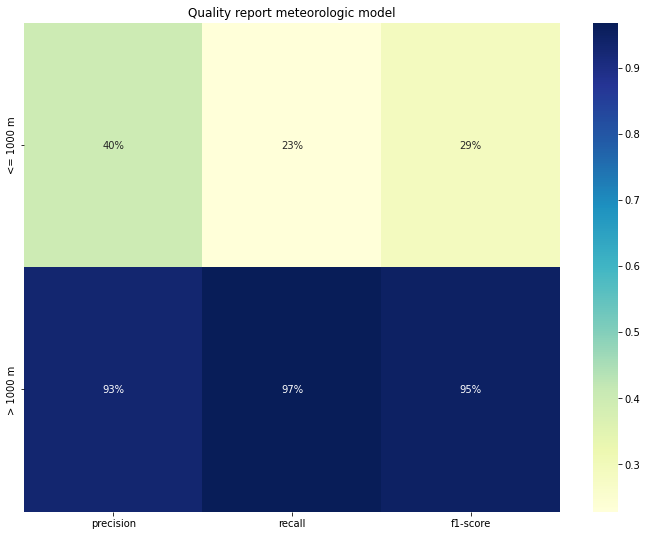

In [19]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all1k.vis_l, df_all1k.visibility0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


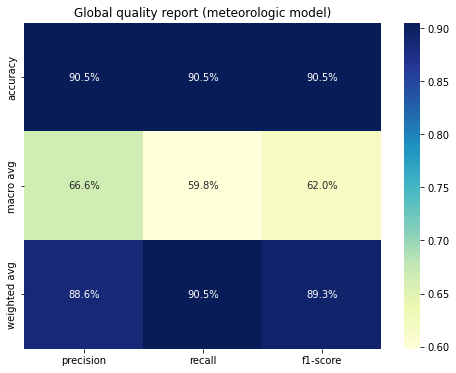

In [20]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

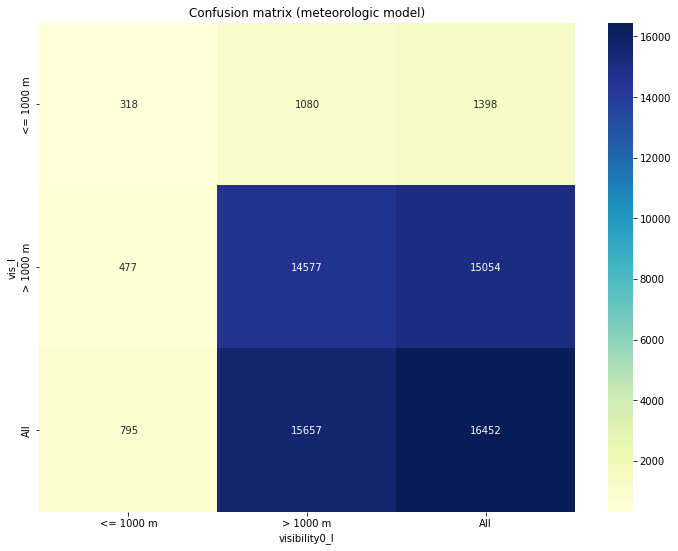

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model)")
import seaborn as sns
global_sc=pd.crosstab(df_all1k.vis_l, df_all1k.visibility0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

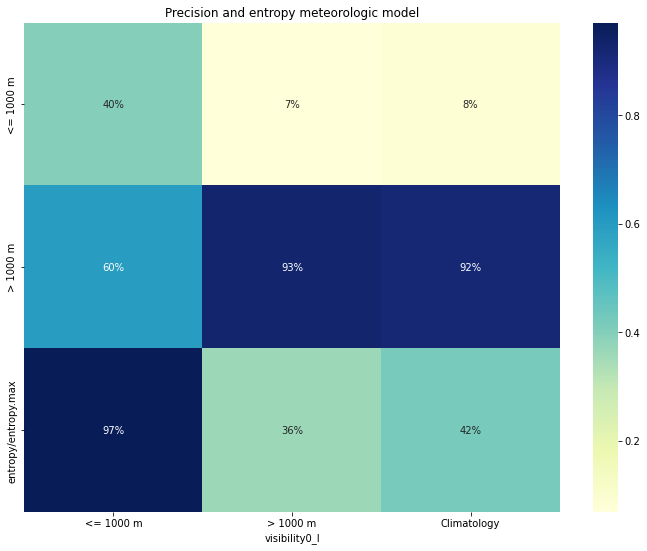

In [22]:
import math
from scipy.stats import entropy


plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model")
column_sc=pd.crosstab(df_all1k.vis_l, df_all1k.visibility0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [23]:
print("Confusion matrix (meteorologic model)\n")
for l in ["visibility0_l","visibility1_l"]:
  cm = pd.crosstab(df_all1k.vis_l, df_all1k[l],margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  hss = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
  print("Heidke Skill Score:",round(hss,2))
  print("\n")

Confusion matrix (meteorologic model)

visibility0_l  <= 1000 m  > 1000 m    All
vis_l                                    
<= 1000 m            318      1080   1398
> 1000 m             477     14577  15054
All                  795     15657  16452
Heidke Skill Score: 0.24


visibility1_l  <= 1000 m  > 1000 m    All
vis_l                                    
<= 1000 m            401       997   1398
> 1000 m             617     14437  15054
All                 1018     15434  16452
Heidke Skill Score: 0.28




In [26]:
df_all1k = df_all1k.drop(columns=["Unnamed: 0","visibility0_l","visibility1_l"])
df_all1k

,vis_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,> 1000 m,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,> 1000 m,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,> 1000 m,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,> 1000 m,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,> 1000 m,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 19:00:00,> 1000 m,9.241409,0.0,1114.372070,4.894399,7.983289,102750.492188,280.356812,0.850322,24155.681641,...,0.0,-0.000438,0.0,0.0,0.0,0.0,5529.350586,1529.656250,248.538376,273.540680
2020-12-24 20:00:00,> 1000 m,17.789364,0.0,1115.066650,5.159622,10.980127,102863.531250,280.214874,0.837604,24115.419922,...,0.0,0.000359,0.0,0.0,0.0,0.0,5534.803223,1534.443115,248.254623,273.497437
2020-12-24 21:00:00,> 1000 m,18.492819,0.0,1114.713379,4.304277,9.638730,102951.648438,280.168427,0.838092,24082.583984,...,0.0,-0.000215,0.0,0.0,0.0,0.0,5545.419434,1536.551025,248.680069,273.530487


In [28]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [01:14<00:00,  2.55s/it]


In [29]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.65,0.76,None,0.73,0.35
Perceptron,0.86,0.76,None,0.88,0.23
BernoulliNB,0.77,0.76,None,0.82,0.33
NearestCentroid,0.77,0.75,None,0.82,0.21
LabelPropagation,0.92,0.74,None,0.92,7.99
LabelSpreading,0.92,0.74,None,0.92,12.28
BaggingClassifier,0.93,0.72,None,0.93,6.24
DecisionTreeClassifier,0.90,0.71,None,0.91,1.15
LGBMClassifier,0.94,0.71,None,0.93,1.47


**ML LGBMClassifier**

In [31]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=250).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        121        71   192
> 1000 m          98      2178  2276
All              219      2249  2468
Heidke Skill Score: 0.55

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
<= 1000 m          0.55    0.63      0.59   192.00
> 1000 m           0.97    0.96      0.96  2276.00
accuracy           0.93    0.93      0.93     0.93
macro avg          0.76    0.79      0.78  2468.00
weighted avg       0.94    0.93      0.93  2468.00

Matriz de Confusión  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        138       104   242
> 1000 m         100      2126  2226
All              238      2230  2468
Heidke Skill Score: 0.53

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
<= 1000 m          0.58    0.57    

,HSS
count,10.00
mean,0.52
std,0.03
min,0.48
25%,0.50
50%,0.52
75%,0.54
max,0.58


In [32]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear

In [33]:
# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=250).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        141        76   217
> 1000 m          78      2173  2251
All              219      2249  2468
Heidke Skill Score: 0.61

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
<= 1000 m          0.64    0.65      0.65   217.00
> 1000 m           0.97    0.97      0.97  2251.00
accuracy           0.94    0.94      0.94     0.94
macro avg          0.81    0.81      0.81  2468.00
weighted avg       0.94    0.94      0.94  2468.00

Matriz de Confusión  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        115        77   192
> 1000 m          81      2195  2276
All              196      2272  2468
Heidke Skill Score: 0.56

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
<= 1000 m          0.59    0.60    

,HSS
count,10.00
mean,0.59
std,0.02
min,0.55
25%,0.57
50%,0.59
75%,0.60
max,0.62


In [34]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("vis_LEVX_1km_time_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=250))])


In [36]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop ranadom
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=150).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        146        67   213
> 1000 m          75      2180  2255
All              221      2247  2468
Heidke Skill Score: 0.64

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
<= 1000 m          0.66    0.69      0.67   213.00
> 1000 m           0.97    0.97      0.97  2255.00
accuracy           0.94    0.94      0.94     0.94
macro avg          0.82    0.83      0.82  2468.00
weighted avg       0.94    0.94      0.94  2468.00

Matriz de Confusión  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        134        70   204
> 1000 m          84      2180  2264
All              218      2250  2468
Heidke Skill Score: 0.6

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
<= 1000 m          0.61    0.66     

,HSS
count,10.00
mean,0.62
std,0.01
min,0.60
25%,0.61
50%,0.62
75%,0.63
max,0.64
